<a href="https://colab.research.google.com/github/Brian-Adams-code/Brian-Adams-code/blob/main/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
print("OpenCV-Python Version {}".format(cv2.__version__))

OpenCV-Python Version 4.8.0


# reading the sample image from a url

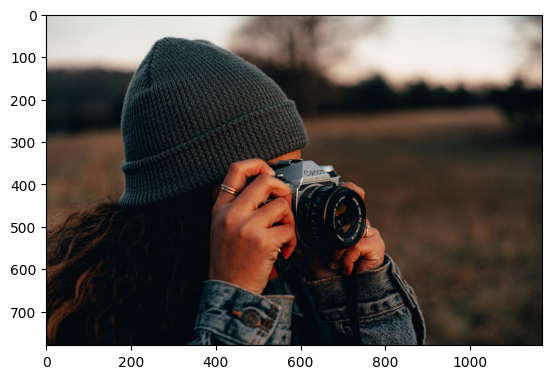

In [9]:
from skimage import io
import matplotlib.pyplot as plt


image = io.imread('https://images.unsplash.com/photo-1575936123452-b67c3203c357?q=80&w=1170&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
plt.imshow(image)
plt.show()

# saving the image on the disk

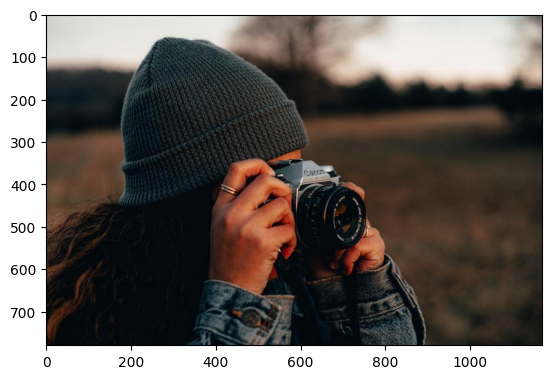

In [13]:
# saving the image on the disk
io.imsave('image.jpg', image)

# loading the image from the disk
image = cv2.imread('image.jpg')

plt.imshow(image)
plt.show()

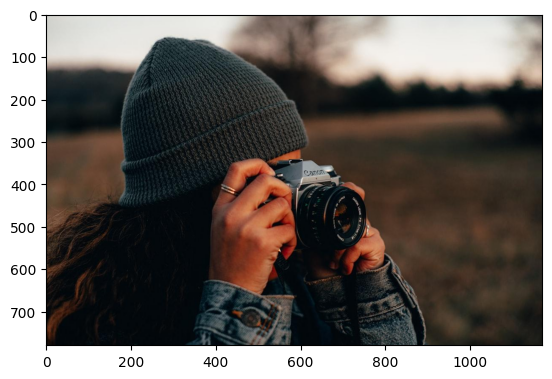

In [11]:
# plt.imshow(img) shown an image with wrong colorspace. we should correct the colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

#Implement an application to capture live video from a camera and display it frame by frame.

In [7]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [8]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotFoundError: Requested device not found


#Create a Python program to convert an image from RGB to grayscale using OpenCV.

Grayscale image saved successfully!


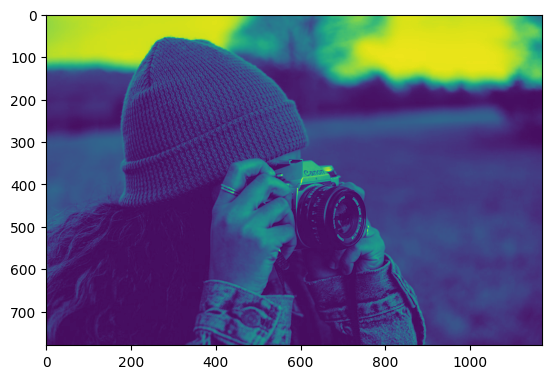

In [31]:
import cv2
from skimage import io
import matplotlib.pyplot as plt

def rgb_to_grayscale(input_image_path, output_image_path):
    # Read the image
    image = input_image_path

    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Save the grayscale image
    cv2.imwrite(output_image_path, grayscale_image)

    print("Grayscale image saved successfully!")
    plt.imshow(grayscale_image)
    plt.show()

if __name__ == "__main__":
    input_image_path = io.imread('https://images.unsplash.com/photo-1575936123452-b67c3203c357?q=80&w=1170&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')  # Path to the input RGB image
    output_image_path = "output_grayscale_image.jpg"  # Path to save the output grayscale image

    rgb_to_grayscale(input_image_path, output_image_path)


#Develop a script that performs image resizing and rotation.

In [32]:
import cv2
import numpy as np

def resize_and_rotate_image(input_image_path, output_image_path, scale_percent=50, rotation_angle=45):
    # Read the image
    image = cv2.imread(input_image_path)

    # Get the image dimensions
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)

    # Resize the image
    resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

    # Define the rotation center
    center = (width // 2, height // 2)

    # Perform the rotation
    rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
    rotated_image = cv2.warpAffine(resized_image, rotation_matrix, (width, height))

    # Save the resized and rotated image
    cv2.imwrite(output_image_path, rotated_image)

    print("Resized and rotated image saved successfully!")

if __name__ == "__main__":
    input_image_path = "/content/output_grayscale_image.jpg"  # Path to the input image
    output_image_path = "output_resized_rotated_image.jpg"  # Path to save the output image

    # Specify the scale percent and rotation angle
    scale_percent = 50  # 50% of the original size
    rotation_angle = 45  # 45 degrees rotation

    resize_and_rotate_image(input_image_path, output_image_path, scale_percent, rotation_angle)


Resized and rotated image saved successfully!


#Write a program that applies a Gaussian blur to an image.

In [33]:
import cv2

def apply_gaussian_blur(input_image_path, output_image_path, kernel_size=(5, 5), sigma_x=0):
    # Read the image
    image = cv2.imread(input_image_path)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma_x)

    # Save the blurred image
    cv2.imwrite(output_image_path, blurred_image)

    print("Gaussian blur applied and image saved successfully!")

if __name__ == "__main__":
    input_image_path = "/content/output_grayscale_image.jpg"  # Path to the input image
    output_image_path = "output_blurred_image.jpg"  # Path to save the output image

    # Specify kernel size and sigma_x (standard deviation in X direction)
    kernel_size = (5, 5)  # Kernel size for Gaussian blur (should be odd)
    sigma_x = 0  # Standard deviation in X direction (0 means calculated from kernel size)

    apply_gaussian_blur(input_image_path, output_image_path, kernel_size, sigma_x)


Gaussian blur applied and image saved successfully!


#Use OpenCV to perform a Fourier transform on an image and visualize the magnitude
spectrum.

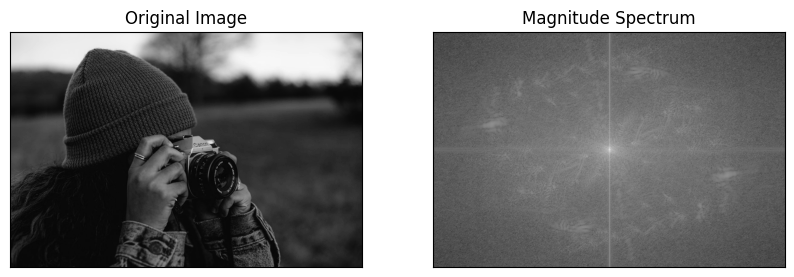

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_magnitude_spectrum(input_image_path):
    # Read the image in grayscale
    image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Perform Fourier transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Compute magnitude spectrum
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

    # Display original and magnitude spectrum images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.xticks([]), plt.yticks([])

    plt.show()

if __name__ == "__main__":
    input_image_path = "/content/output_grayscale_image.jpg"  # Path to the input image
    visualize_magnitude_spectrum(input_image_path)


#Design a filter that removes high-frequency noise from an image.

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_high_frequency_noise(input_image_path, output_image_path, kernel_size=(5, 5), sigma_x=0):
    # Read the image
    image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to remove high-frequency noise
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma_x)

    # Save the denoised image
    cv2.imwrite(output_image_path, blurred_image)

    print("High-frequency noise removed and image saved successfully!")

if __name__ == "__main__":
    input_image_path = "/content/output_grayscale_image.jpg"  # Path to the input image
    output_image_path = "output_denoised_image.jpg"  # Path to save the output denoised image

    # Specify kernel size and sigma_x (standard deviation in X direction)
    kernel_size = (5, 5)  # Kernel size for Gaussian blur (should be odd)
    sigma_x = 0  # Standard deviation in X direction (0 means calculated from kernel size)

    remove_high_frequency_noise(input_image_path, output_image_path, kernel_size, sigma_x)


High-frequency noise removed and image saved successfully!


#Implement an algorithm to deblur an image using the Weiner filter in OpenCV.

In [45]:
import cv2
import numpy as np
from scipy.signal import convolve2d
from scipy.signal import fftconvolve
from scipy.signal import gaussian
from scipy.ndimage import filters
from scipy import fftpack

def wiener_deconvolution(blurred_image, psf, noise_var):
    # Fourier transform of the blurred image
    blurred_ft = fftpack.fftshift(fftpack.fft2(blurred_image))

    # Fourier transform of the PSF
    psf_ft = fftpack.fftshift(fftpack.fft2(psf, blurred_image.shape))

    # Power spectrum of the PSF
    psf_power = np.abs(psf_ft) ** 2

    # Wiener deconvolution
    wiener_filter = np.conj(psf_ft) / (psf_power + noise_var / np.abs(blurred_ft) ** 2)
    restored_image_ft = blurred_ft * wiener_filter

    # Inverse Fourier transform to get the deblurred image
    restored_image = np.abs(fftpack.ifft2(fftpack.ifftshift(restored_image_ft)))

    return restored_image

if __name__ == "__main__":
    input_image_path = "/content/output_blurred_image.jpg"  # Path to the blurred input image
    output_image_path = "deblurred_image.jpg"  # Path to save the deblurred output image

    # Read the blurred image
    blurred_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Define the point spread function (PSF) of the blur
    psf = np.ones((5, 5)) / 25  # Example PSF: 5x5 averaging filter

    # Define the noise variance
    noise_var = 0.01  # Example noise variance

    # Perform Wiener deconvolution
    deblurred_image = wiener_deconvolution(blurred_image, psf, noise_var)

    # Clip the pixel values to the valid range [0, 255]
    deblurred_image = np.clip(deblurred_image, 0, 255)

    # Convert the deblurred image back to uint8
    deblurred_image = np.uint8(deblurred_image)

    # Save the deblurred image
    cv2.imwrite(output_image_path, deblurred_image)

    print("Deblurred image saved successfully!")


Deblurred image saved successfully!


#Assignment to be marked after two weeks



#Create a script that segments an image based on color.

In [47]:
import cv2
import numpy as np

def segment_image_by_color(input_image_path, output_image_path, lower_color, upper_color):
    # Read the image
    image = input_image_path

    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the color to segment
    lower_bound = np.array(lower_color, dtype=np.uint8)
    upper_bound = np.array(upper_color, dtype=np.uint8)

    # Create a mask based on the color range
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # Apply the mask to the original image
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    # Save the segmented image
    cv2.imwrite(output_image_path, segmented_image)

    print("Segmented image saved successfully!")

if __name__ == "__main__":
    input_image_path = io.imread('https://images.unsplash.com/photo-1575936123452-b67c3203c357?q=80&w=1170&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')  # Path to the input image
    output_image_path = "output_segmented_image.jpg"  # Path to save the segmented output image

    # Define the lower and upper bounds of the color to segment (in HSV color space)
    lower_color = [0, 50, 50]  # Lower bound of color (Hue, Saturation, Value)
    upper_color = [20, 255, 255]  # Upper bound of color (Hue, Saturation, Value)

    segment_image_by_color(input_image_path, output_image_path, lower_color, upper_color)


Segmented image saved successfully!


#Write a Python application to change the color space of an image from RGB to HSV and segment based on color intensity.

In [48]:
import cv2
import numpy as np

def segment_image_by_intensity(input_image_path, output_image_path, intensity_threshold):
    # Read the image
    image = input_image_path

    # Convert the image from RGB to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Extract the Value channel (intensity) from the HSV image
    v_channel = hsv_image[:, :, 2]

    # Create a binary mask based on the intensity threshold
    mask = cv2.threshold(v_channel, intensity_threshold, 255, cv2.THRESH_BINARY)[1]

    # Apply the mask to the original image
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    # Save the segmented image
    cv2.imwrite(output_image_path, segmented_image)

    print("Segmented image saved successfully!")

if __name__ == "__main__":
    input_image_path = io.imread('https://images.unsplash.com/photo-1575936123452-b67c3203c357?q=80&w=1170&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')  # Path to the input image
    output_image_path = "output_segmented_image2.jpg"  # Path to save the segmented output image

    # Define the intensity threshold for segmentation
    intensity_threshold = 100  # Example intensity threshold (adjust as needed)

    segment_image_by_intensity(input_image_path, output_image_path, intensity_threshold)


Segmented image saved successfully!


#Write a program that reconstructs an image from its edge map.

In [55]:
import cv2
import numpy as np

def reconstruct_image_from_edge_map(edge_map_path, output_image_path):
    # Read the edge map
    edge_map = cv2.imread(edge_map_path, cv2.IMREAD_GRAYSCALE)

    # Check if the edge map was loaded successfully
    if edge_map is None:
        print("Error: Failed to load the edge map.")
        return

    # Create a mask where the edges are marked as invalid regions for inpainting
    mask = np.where(edge_map > 0, 0, 255).astype(np.uint8)

    # Inpainting to reconstruct the image
    reconstructed_image = cv2.inpaint(edge_map, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    # Save the reconstructed image
    cv2.imwrite(output_image_path, reconstructed_image)

    print("Reconstructed image saved successfully!")

if __name__ == "__main__":
    edge_map_path = "/content/constructed.jpeg"  # Path to the edge map
    output_image_path = "reconstructed_image.jpg"  # Path to save the reconstructed image

    reconstruct_image_from_edge_map(edge_map_path, output_image_path)


Reconstructed image saved successfully!
